Daily Temperatures: [38 28 14  7 20 38 18 22 10 10 23 35 39 23  2 21  1 23 29 37  1 20 32 11
 21 24 26 27 15 14]
Mean Temperature: 20.966666666666665
Minimum Temperature: 1
Maximum Temperature: 39
Day with Maximum Temperature: 13
Temperatures above the mean: [38 28 38 22 23 35 39 23 21 23 29 37 32 21 24 26 27]


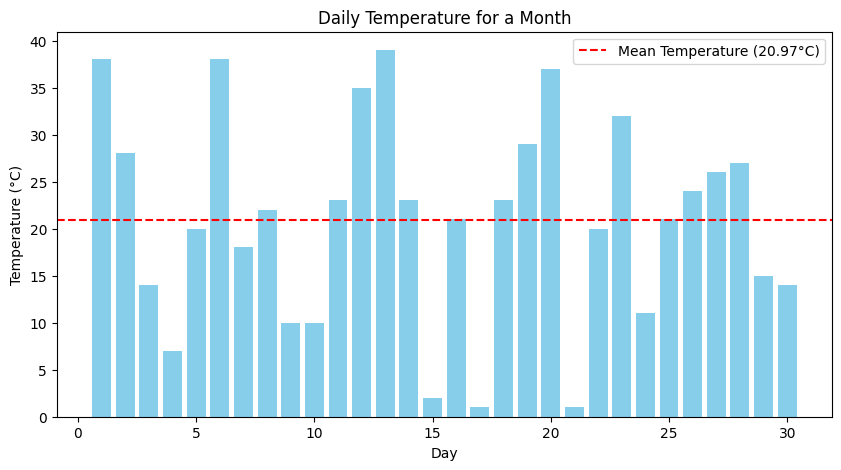

In [2]:
# Exercise 1: NumPy Temperature Analysis
# -----------------------------------------
# This script generates an array of 30 random daily temperatures (in °C) using NumPy.
# It calculates statistical metrics such as mean, minimum, and maximum temperatures.
# It also finds the day with the maximum temperature and filters temperatures above the mean.
# Optionally, it plots a bar chart of the daily temperatures using matplotlib.

import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate an array of 30 random temperatures between 0 and 40 (inclusive)
temperatures = np.random.randint(0, 41, size=30)

# Calculate the mean, minimum, and maximum temperatures
mean_temp = temperatures.mean()
min_temp = temperatures.min()
max_temp = temperatures.max()

# Find the index (day) with the maximum temperature (adding 1 to convert from 0-indexed to day number)
max_temp_day = np.argmax(temperatures) + 1

# Filter the array to include only temperatures above the mean
above_mean_temps = temperatures[temperatures > mean_temp]

# Print the computed results
print("Daily Temperatures:", temperatures)
print("Mean Temperature:", mean_temp)
print("Minimum Temperature:", min_temp)
print("Maximum Temperature:", max_temp)
print("Day with Maximum Temperature:", max_temp_day)
print("Temperatures above the mean:", above_mean_temps)

# Optional: Plot a bar chart of the daily temperatures
plt.figure(figsize=(10, 5))
plt.bar(range(1, 31), temperatures, color='skyblue')
plt.axhline(mean_temp, color='red', linestyle='--', label=f'Mean Temperature ({mean_temp:.2f}°C)')
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.title("Daily Temperature for a Month")
plt.legend()
plt.show()


In [32]:
# Exercise 2: Pandas - Daily Sales Management
# ---------------------------------------------
# This script creates a DataFrame representing daily sales data.
# The DataFrame includes columns for Date, Product, Quantity, and Price.
# A new column "Total" is computed as Quantity multiplied by Price.
# Overall statistics are computed including total sales, average product price, and the best selling product.
# The data is then grouped by product to calculate total and average sales, and sorted by total sales in descending order.

import pandas as pd

# Create sample sales data with at least 10 rows
data = {
    'Date': ['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05',
             '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09', '2023-09-10'],
    'Product': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Quantity': [10, 5, 7, 3, 8, 12, 4, 6, 9, 2],
    'Price': [100, 200, 100, 150, 200, 100, 150, 200, 100, 150]
}

# Create a DataFrame from the data
sales_df = pd.DataFrame(data)

# Convert the 'Date' column to datetime format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Create a new column "Total" as the product of Quantity and Price
sales_df['Total'] = sales_df['Quantity'] * sales_df['Price']

# Calculate overall statistics
total_sales = sales_df['Total'].sum()       # Sum of all sales totals
average_price = sales_df['Price'].mean()      # Average product price

# Determine the best selling product based on the total Quantity sold
best_selling_product = sales_df.groupby('Product')['Quantity'].sum().idxmax()

# Group data by 'Product' and calculate total sales and average price for each product
grouped_sales = sales_df.groupby('Product').agg({'Total': 'sum', 'Price': 'mean'})

# Sort the grouped data based on total sales in descending order
grouped_sales_sorted = grouped_sales.sort_values(by='Total', ascending=False)

# Print the DataFrame and computed results
print("Sales DataFrame:")
print(sales_df)
print("\nOverall Total Sales:", total_sales)
print("Average Price:", average_price)
print("Best Selling Product:", best_selling_product)
print("\nGrouped Sales (Total and Average Price) Sorted by Total Sales:")
print(grouped_sales_sorted)


Sales DataFrame:
        Date Product  Quantity  Price  Total
0 2023-09-01       A        10    100   1000
1 2023-09-02       B         5    200   1000
2 2023-09-03       A         7    100    700
3 2023-09-04       C         3    150    450
4 2023-09-05       B         8    200   1600
5 2023-09-06       A        12    100   1200
6 2023-09-07       C         4    150    600
7 2023-09-08       B         6    200   1200
8 2023-09-09       A         9    100    900
9 2023-09-10       C         2    150    300

Overall Total Sales: 8950
Average Price: 145.0
Best Selling Product: A

Grouped Sales (Total and Average Price) Sorted by Total Sales:
         Total  Price
Product              
A         3800  100.0
B         3800  200.0
C         1350  150.0


In [77]:
# Exercise 3: Combined Data Analysis - Online Store
# ---------------------------------------------------
# This script simulates data analysis for an online store.
# It creates a DataFrame with columns: order_id, product, quantity, price, customer_id, and date.
# It calculates the order_total as the product of quantity and price.
# A discount function is defined to apply a 10% discount if quantity > 5.
# The script then computes a new column 'final_amount' after discount.
# Finally, it groups the data by product and customer to analyze total sales and identifies high-value orders.

import pandas as pd
import numpy as np

# Create a sample dataset with at least 15 rows for an online store
data = {
    'order_id': [f'ORD{i:03d}' for i in range(1, 16)],  # Generate order IDs like ORD001, ORD002, ..., ORD015
    'product': np.random.choice(['Laptop', 'Smartphone', 'Headphones', 'Monitor'], size=15),
    'quantity': np.random.randint(1, 10, size=15),
    'price': np.random.choice([100, 200, 300, 400, 500], size=15),
    'customer_id': np.random.choice(['CUST1', 'CUST2', 'CUST3', 'CUST4'], size=15),
    'date': pd.date_range(start='2023-09-01', periods=15, freq='D')
}

# Create a DataFrame from the dataset
orders_df = pd.DataFrame(data)

# Calculate the total amount for each order (quantity * price)
orders_df['order_total'] = orders_df['quantity'] * orders_df['price']

# Define a function to apply discount based on quantity
def apply_discount(quantity, total):
    """
    Apply a discount to the order total based on the quantity.

    If quantity > 5, a 10% discount is applied.
    Otherwise, no discount is applied.

    Parameters:
        quantity (int): Number of items in the order.
        total (float): The original order total before discount.

    Returns:
        float: The final order amount after discount.
    """
    if quantity > 5:
        discount_rate = 0.10  # 10% discount
    else:
        discount_rate = 0.0
    # Calculate the final amount after discount
    final_total = total * (1 - discount_rate)
    return final_total

# Apply the discount function to each row and create a new column 'final_amount'
orders_df['final_amount'] = orders_df.apply(lambda row: apply_discount(row['quantity'], row['order_total']), axis=1)

# Group the data by product and calculate the total sales (sum of order_total) for each product
product_group = orders_df.groupby('product')['order_total'].sum()

# Group the data by customer_id and calculate the total spending (sum of final_amount) for each customer
customer_group = orders_df.groupby('customer_id')['final_amount'].sum()

# Identify the customer with the highest total spending
max_spending_customer = customer_group.idxmax()

# Filter orders where the final amount is greater than a specific threshold (e.g., 100)
high_value_orders = orders_df[orders_df['final_amount'] > 100]

# Print the DataFrame and the analysis results
print("Online Store Orders Data:")
print(orders_df)
print("\nTotal Sales by Product:")
print(product_group)
print("\nTotal Spending by Customer:")
print(customer_group)
print(f"\nCustomer with Highest Spending: {max_spending_customer}")
print("\nHigh Value Orders (final_amount > 100):")
print(high_value_orders)


Online Store Orders Data:
   order_id     product  quantity  price customer_id       date  order_total  \
0    ORD001      Laptop         8    200       CUST1 2023-09-01         1600   
1    ORD002      Laptop         4    100       CUST2 2023-09-02          400   
2    ORD003      Laptop         1    100       CUST3 2023-09-03          100   
3    ORD004  Smartphone         8    200       CUST4 2023-09-04         1600   
4    ORD005     Monitor         8    100       CUST2 2023-09-05          800   
5    ORD006  Headphones         1    200       CUST4 2023-09-06          200   
6    ORD007     Monitor         3    400       CUST1 2023-09-07         1200   
7    ORD008  Headphones         3    100       CUST1 2023-09-08          300   
8    ORD009  Headphones         1    200       CUST2 2023-09-09          200   
9    ORD010  Smartphone         6    300       CUST1 2023-09-10         1800   
10   ORD011     Monitor         9    200       CUST4 2023-09-11         1800   
11   ORD012  H